In [ ]:
#TASK 1 - Install matplotlib and deap

!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
#       - Import all necessary libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 4  # Define how many vehicles are available to visit the locations

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals



In [ ]:

#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(individual, locations, depot, num_vehicles, title="Routes"):
    plt.figure(figsize=(8, 6))

    # Split the individual into vehicle routes
    vehicle_routes = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_routes.append(vehicle_route)

    # Plot each vehicle's route
    for i, route in enumerate(vehicle_routes):
        route_x, route_y = zip(*route)  # Unzip the coordinates into x and y lists
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1} Route')  # Plot the route with circles at each point

    # Plot depot as a different marker (e.g., red)
    depot_x, depot_y = zip(*[depot])
    plt.scatter(depot_x, depot_y, color='red', s=100, marker='D', label="Depot")

    # Set labels and title
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title(title)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

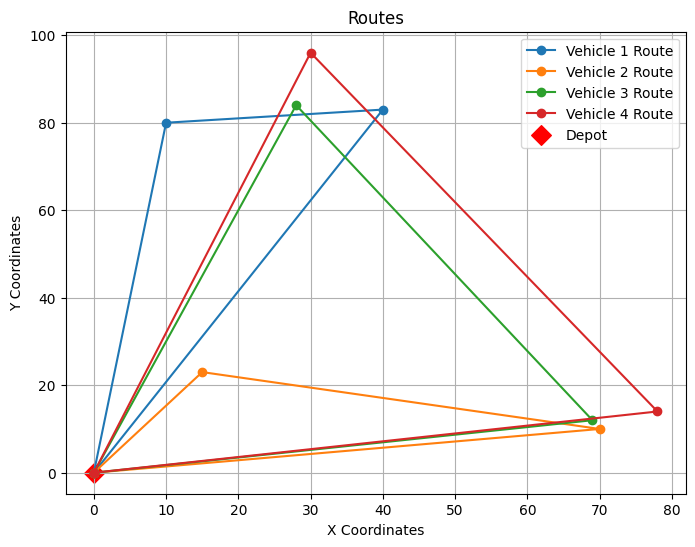

In [ ]:
# Example usage:
individual = [0, 1, 2, 3, 4, 5, 6, 7]
locations = [(10, 80), (15, 23), (28, 84), (30, 96), (40, 83), (70, 10), (69, 12), (78, 14)]
depot = (0, 0)
num_vehicles = 4


plot_routes(individual, locations, depot, num_vehicles)